# <center>ĐỒ ÁN CUỐI KÌ: LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</center>

| MSSV     | Họ và tên       
|----------|---------------
| 19120725  | Lê Trường Vũ 
| 19120615 | Hùng Ngọc Phát 

## Môi trường code

In [1]:
import sys
sys.executable

'/opt/miniconda3/envs/min_ds-env/bin/python'

---

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

---

## Thu thập dữ liệu

Nhóm sẽ dùng [dữ liệu đã được thu thập sẵn](https://www.kaggle.com/azathoth42/myanimelist) là file `AnimeList.csv` đính kèm. Đây là bộ dữ liệu chứa những thông tin về các anime (hoạt hình Nhật Bản)....

Dữ liệu này là được thu thập từ MyAnimeList, là một trang web khá lớn để quản lý những bộ anime/manga đã "cày". MyAnimeList thì được cập nhật hàng ngày, còn dataset này thì được cập nhật lần cuối vào năm 2018.

### License của dữ liệu

Theo như trên Kaggle thì dữ liệu được phân phối dưới license [Database Contents License (DbCL)](https://opendatacommons.org/licenses/dbcl/1-0/).

> 2.1 Rights granted. **The Licensor grants to You** a worldwide, royalty-free, non-exclusive, perpetual, irrevocable copyright **license to do any act that is restricted by copyright over anything within the Contents**, whether in the original medium or any other. These rights explicitly include commercial use, and **do not exclude any field of endeavour**. These rights include, without limitation, the right to sublicense the work.

Có nghĩa là người cung cấp dataset cho phép chúng ta làm bất cứ điều gì với dữ liệu này, miễn không vi phạm các quy định về bản quyền.

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [3]:
animes_df = pd.read_csv('AnimeList.csv')
animes_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột? 

In [4]:
num_cols = len(animes_df.columns)
num_rows = len(animes_df.index)
print('Số dòng: ',num_rows)
print('Số cột: ',num_cols)

Số dòng:  14478
Số cột:  31


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo như mô tả của dữ liệu thì một dòng cho biết thông tin của một 'Anime'. Có vẻ như không có dòng nào bị 'lạc loài'

### Dữ liệu có các dòng bị lặp không? 

Nhóm sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [5]:
have_duplicated_row = all(animes_df.duplicated())
have_duplicated_row

False

Như vậy nghĩa là không có dòng nào bị lặp

### Mỗi cột có ý nghĩa gì?

- `anime_id`: ID của anime trong cơ sở dữ liệu của MyAnimeList.
- `title`: tên phiên âm tiếng Nhật của anime.
- ~~`title_english`: tên dịch tiếng Anh của anime.~~
- ~~`title_japanese`: tên tiếng Nhật (bằng kana/kanji) của anime.~~
- ~~`title_synonyms`: những tên gọi khác của anime.~~
- `image_url`: link đến "ảnh đại diện" của anime trên MyAnimeList.
- `type`: thể loại của anime (TV, movies, OVA, ...).
- `source`: nguồn gốc của anime (là original hay là adaption từ light novel hoặc manga).
- ~~`status`: trạng thái phát sóng của anime dưới dạng chuỗi (tại thời điểm dữ liệu này được thu thập).~~
- `airing`: trạng thái phát sóng của anime (giống như trên) nhưng dưới dạng bool.
- `aired_string`: khoảng thời gian mà anime đã phát sóng (từ ngày nào đến ngày nào).
- ~~`aired`: giống `aired_string`, nhưng dưới dạng json.~~
- `duration`: độ dài của một tập.
- `rating`: giới hạn độ tuổi khi xem (G, PG, PG-13, R-18, ...).
- `score`: điểm số [có trọng số](https://myanimelist.net/info.php?go=topanime) của anime trên thang 10, chấm bởi người dùng.
- `members`: số lượng người đã thêm anime này vào list của họ.
- `favourite`: số lượng người đã đánh dấu anime này là "yêu thích".
- `scored_by`: số lượng người đã chấm điểm cho anime.
- `rank`: thứ hạng của anime, sắp xếp theo score.
- `popularity`: thứ hạng của anime, sắp xếp theo members.
- `background`: chú thích về background của anime (ví dụ như anime này đã có còn phần nào khác hay không)?
- `episodes`: số tập của anime.
- `premiered`: anime đã được công bố vào _mùa_ nào (mùa anime trùng với mùa khí hậu theo lịch Nhật - đông, xuân, hạ, thu).
- `broadcast`: lịch phát sóng.
- `producer`: nhà sản xuất anime (về mặt nội dung). 
- `studio`: công ty tiến hành sản xuất (vẽ) và phân phối anime.
- `genre`: danh sách các thể loại anime.
- `opening_theme`: danh sách các bài hát mở đầu của anime.
- `ending_theme`: danh sách các bài hát kết thúc của anime.
- `licensor`: công ty được cấp phép để phát hành anime ở một khu vực cụ thể (ngoài Nhật Bản)
- `broadcast`: 

Các cột bị gạch bỏ là các cột có vẻ như trùng thông tin với các cột khác về mặt mô tả dữ liệu.

---

### Xóa đi các cột "không cần thiết"

In [6]:
del_cols = ['title_english', 'title_japanese', 'title_synonyms', 'status', 'aired', 'related']
animes_df = animes_df.drop(del_cols, axis=1)
animes_df.set_index('anime_id', inplace=True)
animes_df.head()

,title,image_url,type,source,episodes,airing,aired_string,duration,rating,score,...,favorites,background,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,False,"Jan 13, 2012 to Mar 30, 2012",24 min. per ep.,PG-13 - Teens 13 or older,7.63,...,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,"Apr 2, 2007 to Oct 1, 2007",24 min. per ep.,PG-13 - Teens 13 or older,7.89,...,2579,NaN,Spring 2007,Unknown,"TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,False,"Oct 4, 2008 to Sep 25, 2009",24 min. per ep.,PG - Children,7.55,...,802,NaN,Fall 2008,Unknown,"TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,False,"Aug 16, 2002 to May 23, 2003",16 min. per ep.,PG-13 - Teens 13 or older,8.21,...,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,False,"Oct 6, 2012 to Mar 30, 2013",24 min. per ep.,PG-13 - Teens 13 or older,8.67,...,2082,NaN,Fall 2012,Unknown,"NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

`dtype` của mỗi cột trong `animes_df` sẽ lưu kết quả vào series `col_dtypes`; series này có index là tên cột.

In [7]:
num_cols = len(animes_df.columns)
num_rows = len(animes_df.index)
print('Số dòng: ',num_rows)
print('Số cột: ',num_cols)

Số dòng:  14478
Số cột:  24


In [8]:
col_dtypes = animes_df.dtypes
col_dtypes

title             object
image_url         object
type              object
source            object
episodes           int64
airing              bool
aired_string      object
duration          object
rating            object
score            float64
scored_by          int64
rank             float64
popularity         int64
members            int64
favorites          int64
background        object
premiered         object
broadcast         object
producer          object
licensor          object
studio            object
genre             object
opening_theme     object
ending_theme      object
dtype: object

Như vậy `animes_df` có 16 cột có `dtype` `object` gồm: "title", "image_url", "type", "source", "aired_string", "duration", "rating", "background", "premiered", "broadcast", "producer", "licensor", "studio", "genre", "opening_theme", "ending_theme".
Để tìm hiểu 'dtype' thật sự của các phần tử trong các cột này, nhóm viết hàm `open_object_dtype` nhận đầu vào là một cột `s` (series) có `dtype` là `object` và trả về tập các kiểu dữ liệu thật sự có trong cột này

In [9]:
def open_object_dtype(s):
    dtypes = set()
    dtypes = set(s.apply(type))   
    return dtypes

In [10]:
print('title: ',open_object_dtype(animes_df['title']))
print('image_url: ',open_object_dtype(animes_df['image_url']))
print('type: ',open_object_dtype(animes_df['type']))
print('source: ',open_object_dtype(animes_df['source']))
print('aired_string: ',open_object_dtype(animes_df['aired_string']))
print('duration: ',open_object_dtype(animes_df['duration']))
print('rating: ',open_object_dtype(animes_df['rating']))
print('background: ',open_object_dtype(animes_df['background']))
print('premiered: ',open_object_dtype(animes_df['premiered']))
print('broadcast: ',open_object_dtype(animes_df['broadcast']))
print('producer: ',open_object_dtype(animes_df['producer']))
print('licensor: ',open_object_dtype(animes_df['licensor']))
print('studio: ',open_object_dtype(animes_df['studio']))
print('genre: ',open_object_dtype(animes_df['genre']))
print('opening_theme: ',open_object_dtype(animes_df['opening_theme']))
print('ending_theme: ',open_object_dtype(animes_df['ending_theme']))

title:  {<class 'str'>}
image_url:  {<class 'str'>, <class 'float'>}
type:  {<class 'str'>}
source:  {<class 'str'>}
aired_string:  {<class 'str'>}
duration:  {<class 'str'>}
rating:  {<class 'str'>}
background:  {<class 'str'>, <class 'float'>}
premiered:  {<class 'str'>, <class 'float'>}
broadcast:  {<class 'str'>, <class 'float'>}
producer:  {<class 'str'>, <class 'float'>}
licensor:  {<class 'str'>, <class 'float'>}
studio:  {<class 'str'>, <class 'float'>}
genre:  {<class 'str'>, <class 'float'>}
opening_theme:  {<class 'str'>}
ending_theme:  {<class 'str'>}


.................

---

## Tiền xử lý

### Chuyển dtype của cột "aired" sang datetime

Ta sẽ chia cột `aired` thành hai cột riêng nữa là `aired_from` và `aired_to`<br>
Sau đó thì chuyển `dtype` của hai cột này sang `datetime`

In [11]:
#Tách cột aired sang 2 cột aired_from, aired_to và thêm vào animes_df
animes_df[['aired_from', 'aired_to']] = animes_df['aired_string'].str.split('to', 1, expand = True)
#Chuyển dtype sang datetime
animes_df['aired_from'] = pd.to_datetime(animes_df['aired_from'], errors='coerce')
animes_df['aired_to'] = pd.to_datetime(animes_df['aired_to'], errors='coerce')

In [12]:
print('aired_from type: ',animes_df['aired_from'].dtype)
print('aired_to type: ', animes_df['aired_from'].dtype)

aired_from type:  datetime64[ns]
aired_to type:  datetime64[ns]


Sau khi đã tách xong thì ta sẽ xóa luôn cột `aired_string` do không cần thiết nữa

In [13]:
del animes_df['aired_string']

### Chuyển các phần tử trong cột "opening_theme" , "ending_theme", "genre" và "producer" sang dạng list

Hiện tại thì các phần tử trong cột `opening_theme` và `ending_theme` có dạng `str`khá đặc biệt. <br>

Vd:<br> 
"['#1: "Minna no Tamago (みんなのたまご)" by Shugo Chara Egg (eps 1-13)',
 '#2: "Shugo Shugo! (しゅごしゅご!)" by Shugo Chara Egg (eps 14-25)',
 '#3: "Omakase♪Guardian (おまかせ♪ガーディアン)" by Guardians 4 (eps 26-38)',
 '#4: "School Days" by Guardians 4 (eps 39-51)']"

In [14]:
animes_df['opening_theme'] = animes_df['opening_theme'].apply(literal_eval)
animes_df['ending_theme'] = animes_df['ending_theme'].apply(literal_eval)

Trong cột 'genre' và 'producer' có giá trị NaN và ta sẽ không tác động đến các dòng này vì nó sẽ làm sai lệch thông tin về giá trị thiếu.

In [15]:
genre_na = animes_df.genre.isna()
animes_df.loc[~genre_na, 'genre'] = animes_df.loc[~genre_na, 'genre'].str.split(',\s*')

In [16]:
producer_na = animes_df.producer.isna()
animes_df.loc[~producer_na, 'producer'] = animes_df.loc[~producer_na, 'producer'].str.split(',\s*')

Lý do phải dùng regex `',\s*'` là vì cột này có mỗi hàng là một chuỗi biểu diễn danh sách các genre của anime được cách nhau bởi dấu phẩy, và đa phần trường hợp sẽ có cả dấu cách. Regex trên sẽ match dấu phẩy và có thể có _0 hoặc nhiều dấu cách_ (để cho tổng quát hơn).

In [17]:
# Danh sách tất cả genre
animes_df['genre'].explode().value_counts()

Comedy           5251
Action           3253
Fantasy          2703
Adventure        2582
Drama            2294
Sci-Fi           2272
Kids             2003
Shounen          1771
Romance          1634
Slice of Life    1532
School           1406
Music            1351
Supernatural     1219
Hentai           1218
Mecha            1009
Historical        958
Magic             921
Seinen            698
Ecchi             685
Shoujo            643
Sports            624
Mystery           606
Parody            540
Super Power       533
Military          487
Space             436
Horror            413
Demons            373
Harem             353
Martial Arts      310
Dementia          293
Game              290
Psychological     288
Police            221
Samurai           175
Vampire           125
Thriller          100
Cars               92
Josei              81
Shounen Ai         79
Shoujo Ai          67
Yuri               41
Yaoi               39
Name: genre, dtype: int64

In [18]:
print('opening_theme type: ',open_object_dtype(animes_df['opening_theme']))
print('ending_theme type: ',open_object_dtype(animes_df['ending_theme']))
print('genre type: ',open_object_dtype(animes_df['genre']))
print('producer type: ',open_object_dtype(animes_df['producer']))

opening_theme type:  {<class 'list'>}
ending_theme type:  {<class 'list'>}
genre type:  {<class 'list'>, <class 'float'>}
producer type:  {<class 'list'>, <class 'float'>}


---

In [19]:
animes_df

,title,image_url,type,source,episodes,airing,duration,rating,score,scored_by,...,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,False,24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,...,Winter 2012,Fridays at Unknown,"[Aniplex, Square Enix, Mainichi Broadcasting S...",Sentai Filmworks,David Production,"[Comedy, Supernatural, Romance, Shounen]","[""Nirvana"" by MUCC]","[#1: ""Nirvana"" by MUCC (eps 1, 11-12), #2: ""Ra...",2012-01-13,2012-03-30
2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,...,Spring 2007,Unknown,"[TV Tokyo, AIC, Square Enix, Sotsu]",Funimation,Gonzo,"[Comedy, Parody, Romance, School, Shounen]","[""Romantic summer"" by SUN&LUNAR]","[#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hin...",2007-04-02,2007-10-01
5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,False,24 min. per ep.,PG - Children,7.55,37129,...,Fall 2008,Unknown,"[TV Tokyo, Sotsu]",NaN,Satelight,"[Comedy, Magic, School, Shoujo]","[#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Char...","[#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! (...",2008-10-04,2009-09-25
721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,False,16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,...,Summer 2002,Fridays at Unknown,"[Memory-Tech, GANSIS, Marvelous AQL]",ADV Films,Hal Film Maker,"[Comedy, Drama, Magic, Romance, Fantasy]","[""Morning Grace"" by Ritsuko Okazaki]","[""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko O...",2002-08-16,2003-05-23
12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,False,24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,...,Fall 2012,Unknown,"[NHK, Shueisha]",NaN,J.C.Staff,"[Comedy, Drama, Romance, Shounen]","[#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIPE...","[#1: ""Pride on Everyday"" by Sphere (eps 1-13),...",2012-10-06,2013-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26089,Gutchonpa Omoshiro Hanashi,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,False,8 min. per ep.,G - All Ages,5.50,6,...,Fall 1987,Unknown,NaN,NaN,NaN,[Kids],[],[],1987-11-05,1988-11-04
21525,Geba Geba Shou Time!,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,False,25 min.,G - All Ages,4.60,5,...,NaN,NaN,[Studio Lotus],NaN,NaN,[Comedy],[],[],1986-03-21,NaT
37897,Godzilla: Hoshi wo Kuu Mono,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,False,Unknown,R - 17+ (violence & profanity),0.00,0,...,NaN,NaN,NaN,NaN,NaN,"[Action, Sci-Fi, Adventure, Fantasy]",[],[],2018-11-01,NaT


## Khám phá dữ liệu & tiền xử lý (tiếp theo)

### Hiểu rõ hơn về 2 cột `duration` và `episodes`

Dựa vào kinh nghiệm xem anime thì một tập anime thường có độ dài khoảng 20-25 phút. Cột `duration` hiện tại đang là kiểu string, hãy thử lấy ra 20 giá trị ngẫu nhiên từ các giá trị unique từ cột này để xem có đúng như vậy không.

In [20]:
animes_df.duration.value_counts().sample(20)

34 sec.                   1
7 sec.                    1
46 sec. per ep.           1
37 sec. per ep.           2
1 hr. 2 min. per ep.      1
26 min.                  80
28 min. per ep.          92
2 hr. 4 min.              1
13 sec.                   1
2 min.                  476
24 min.                 268
35 sec.                   3
1 hr. per ep.             6
39 sec. per ep.           6
53 min.                  16
1 hr. 29 min.            27
23 sec.                   1
1 hr. 34 min.            28
1 hr. 45 min.            27
5 min. per ep.          318
Name: duration, dtype: int64

Hmmmm, vậy là độ dài của anime được biểu diễn bằng một chuỗi biểu diễn theo format giờ, phút, giây. Những "anime" có độ dài ít hơn 1 phút có thể là quảng cáo dạng anime.

Nhưng tại sao lại có một số anime có `per ep.`, một số lại không có?

In [21]:
perep_rows = animes_df.duration.str.contains('per ep.')
perep_index = animes_df[perep_rows].index
animes_df.loc[perep_index, ['duration', 'episodes']]

,duration,episodes
anime_id,,
11013,24 min. per ep.,12
2104,24 min. per ep.,26
5262,24 min. per ep.,51
721,16 min. per ep.,38
12365,24 min. per ep.,25
...,...,...
37300,28 min. per ep.,52
36270,29 min. per ep.,3
37577,4 min. per ep.,3


~/source/HCMUS-Prog4DataSc-FinalProjVậy có lẽ những anime có `per ep` là những anime có nhiều tập, còn những bộ còn lại là chỉ có "1 tập" (movie, OVA, ...)?

In [22]:
suspect_short_animes_df = animes_df.loc[animes_df[~perep_rows].index, ['duration', 'episodes']]
suspect_short_animes_df

,duration,episodes
anime_id,,
966,21 min.,0
21,24 min.,0
33185,Unknown,1
7518,2 min.,1
9389,57 min.,1
...,...,...
35040,20 min.,1
21525,25 min.,1
37897,Unknown,1


In [23]:
suspect_short_animes_df.episodes.value_counts()

1     6857
0      504
2        9
3        5
6        5
13       4
12       4
26       3
5        2
4        2
52       1
9        1
36       1
24       1
30       1
7        1
59       1
63       1
Name: episodes, dtype: int64

Hmmmm, vậy đúng là đa số anime không có `per ep.` trong duration là "1 tập" hoặc "0 tập" (0 tập là gì thì xem sau). Ngoài ra cũng rất nhiều bộ có nhiều tập mà không có `per ep`. Như vậy đây chỉ là do sự không thống nhất trong cách "đặt tên".

Cơ mà 0 tập là sao?

In [24]:
animes_df[animes_df.episodes == 0].sort_values('score', ascending=False).head(10)

,title,image_url,type,source,episodes,airing,duration,rating,score,scored_by,...,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
anime_id,,,,,,,,,,,,,,,,,,,,,
37405,Dokidoki Little Ooyasan,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,True,30 min.,Rx - Hentai,9.52,33,...,NaN,NaN,NaN,NaN,Collaboration Works,[Hentai],[],[],2018-05-25,NaT
36949,Shokugeki no Souma: San no Sara - Toutsuki Res...,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,True,24 min.,PG-13 - Teens 13 or older,8.58,20271,...,Spring 2018,Mondays at 00:30 (JST),[Shueisha],NaN,J.C.Staff,"[Ecchi, School, Shounen]","[""Symbol (シンボル)"" by Luck Life]","[""Atria (アトリア)"" by Fo&#039;xTails]",2018-04-09,NaT
21,One Piece,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,True,24 min.,PG-13 - Teens 13 or older,8.54,423868,...,Fall 1999,Sundays at 09:30 (JST),"[Fuji TV, TAP, Shueisha]","Funimation, 4Kids Entertainment",Toei Animation,"[Action, Adventure, Comedy, Super Power, Drama...","[#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani (...","[#01: ""memories"" by Maki Otsuki (eps 1-30), #0...",1999-10-20,NaT
36910,Wu Geng Ji 2nd Season,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Manga,0,True,16 min.,PG-13 - Teens 13 or older,8.46,28,...,NaN,NaN,[Tencent Penguin Pictures],NaN,Sparkly Key Animation Studio,"[Action, Historical, Supernatural, Martial Art...",[],[],2017-12-29,NaT
235,Detective Conan,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,True,25 min.,PG-13 - Teens 13 or older,8.25,77883,...,Winter 1996,Saturdays at 18:00 (JST),"[Yomiuri Telecasting, Animax, YTV, TMS-Kyokuch...","Funimation, Crunchyroll",TMS Entertainment,"[Adventure, Mystery, Comedy, Police, Shounen]","[#01: ""Mune ga Dokidoki (胸がドキドキ)"" by the High-...","[#01: ""Step by Step"" by Ziggy (eps 1-26), #02:...",1996-01-08,NaT
33064,Uchuu Senkan Yamato 2202: Ai no Senshi-tachi,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,0,True,25 min.,PG-13 - Teens 13 or older,8.10,792,...,NaN,NaN,NaN,Funimation,Xebec,"[Action, Military, Sci-Fi, Space, Drama]","[""Uchuu Senkan Yamato 2202 (宇宙戦艦ヤマト2202)"" by I...","[#1: ""Yamato yori Ai wo Komete (ヤマトより愛をこめて)"" b...",2017-02-25,NaT
30120,Spoon-hime no Swing Kitchen,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,False,1 min.,PG - Children,7.88,8,...,Spring 1997,Unknown,[NHK],NaN,NaN,"[Kids, Adventure]",[],[],1997-04-07,1999-04-10
37864,China KFC x Gintama,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Unknown,0,True,2 min.,G - All Ages,7.88,17,...,NaN,NaN,NaN,NaN,NaN,[Comedy],[],[],2018-05-09,NaT
33443,Luo Xiao Hei Zhan Ji,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,0,True,7 min.,PG - Children,7.87,31,...,NaN,NaN,NaN,NaN,NaN,"[Comedy, Supernatural]",[],[],2011-03-17,NaT


Dữ liệu trên được sắp xếp theo score vì thông thường score càng cao thì càng nổi, sẽ dễ quan sát hơn.

Em đã xem thủ công thông tin của một số bộ anime trên ở trên web MyAnimeList, và dựa vào kinh nghiệm thì các bộ có 0 tập này hoặc là có số tập không được công bố trước và chưa kết thúc (như One Piece, Detective Conan), hoặc là chỉ mới công bố, chưa được chiếu nên chưa biết số tập, hoặc cũng có thể là không có thông tin (ta sẽ kiểm chứng điều này sau khi tính phần trăm giá trị thiếu).

### Tiến hành xử lý cột `duration`

Em sẽ đổi tất cả hàng về số phút. Với những anime dài hơn 1 phút thì em sẽ bỏ qua số giây, còn nếu nó ngắn hơn 1 phút thì sẽ được biểu diễn bằng số thập phân.

In [25]:
def extract_duration_time(interval):
    return animes_df.duration.str.extract(f'(\d+) {interval}.')[0].astype(float)

hr_series = extract_duration_time('hr')
min_series = extract_duration_time('min')
sec_series = extract_duration_time('sec')
dur_series = min_series.copy()

nan_to_zero = lambda *args: tuple(0 if np.isnan(i) else i for i in args)

for idx in hr_series.index:
    # Nếu 1 trong 3 cột khác nan thì tính ra số phút
    # Nếu cả 3 cột là nan thì gán là nan
    if any((hr_series[idx] != np.nan, min_series[idx] != np.nan, sec_series[idx] != np.nan)):
        hr, m, sec = nan_to_zero(hr_series[idx], min_series[idx], sec_series[idx])
        if (hr, m) == (0, 0):
            dur_series[idx] = round(sec/60)
        else:
            dur_series[idx] = m + hr * 60
    else:
        dur_series[idx] = np.nan

In [26]:
animes_df.duration = dur_series
animes_df.sample(10)

,title,image_url,type,source,episodes,airing,duration,rating,score,scored_by,...,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
anime_id,,,,,,,,,,,,,,,,,,,,,
15077,Tabisuru Nuigurumi: Traveling Daru,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Unknown,1,False,10.0,G - All Ages,7.38,1849,...,NaN,NaN,[CoMix Wave Films],NaN,NaN,"[Kids, Slice of Life]",[],[],2012-07-06,NaT
2674,Doraemon Movie 16: Nobita no Sousei Nikki,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Unknown,1,False,98.0,PG - Children,7.18,558,...,NaN,NaN,NaN,NaN,Shin-Ei Animation,"[Adventure, Comedy, Fantasy, Kids, Sci-Fi, Sho...","[""Doraemon no Uta (ドラえもんのうた)"" by Satoko Yamano]","[""Sayonara ni Sayonara (さよならにさよなら)"" by Kaientai]",1995-03-04,NaT
1100,Soreyuke! Uchuu Senkan Yamamoto Yohko,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Novel,3,False,30.0,PG-13 - Teens 13 or older,6.23,658,...,NaN,NaN,[Kadokawa Shoten],NaN,J.C.Staff,"[Sci-Fi, Adventure, Comedy]",[],"[#1: ""Shake It"" by Masami Okui (eps 1-2), #2: ...",1996-03-06,1996-06-05
21421,Mahou Shoujo Taisen,https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,26,False,4.0,PG-13 - Teens 13 or older,5.81,4366,...,Spring 2014,Unknown,NaN,NaN,Gainax,[Magic],"[""All Over (オール・オーヴァー)"" by livetune adding Ann...",[],2014-04-08,2014-09-30
9221,Kanzen Shouri Daiteiou,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,False,7.0,PG - Children,5.01,230,...,NaN,NaN,NaN,NaN,Sunrise,"[Action, Adventure, Kids, Mecha, Sci-Fi]",[],[],2001-12-22,NaT
12585,Inazuma Eleven Go: Tokubetsu-hen,https://myanimelist.cdn-dena.com/images/anime/...,Special,Unknown,2,False,23.0,G - All Ages,6.81,1026,...,NaN,NaN,NaN,NaN,OLM,"[Sports, Super Power, Shounen]",[],[],2011-12-08,2011-12-23
31692,Gogulyeoui Jeolm-eun Musadeul,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,0,False,27.0,None,5.29,7,...,NaN,Unknown,NaN,NaN,NaN,[Historical],[],[],2012-01-01,NaT
1378,Sengoku Kitan Youtouden Movie,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Unknown,1,False,86.0,R - 17+ (violence & profanity),6.03,1725,...,NaN,NaN,NaN,Central Park Media,J.C.Staff,"[Action, Martial Arts, Samurai]",[],"[""The Element of a Dream"" by Lily]",1989-05-27,NaT
10691,Downloader,https://myanimelist.cdn-dena.com/images/anime/...,Music,Unknown,1,False,3.0,G - All Ages,6.05,2593,...,NaN,NaN,NaN,NaN,Studio Deen,[Music],[],[],2011-05-27,NaT


### Xử lý `rating`

In [27]:
animes_df.rating.value_counts()

PG-13 - Teens 13 or older         5020
G - All Ages                      4541
PG - Children                     1279
Rx - Hentai                       1219
R - 17+ (violence & profanity)     997
R+ - Mild Nudity                   878
None                               544
Name: rating, dtype: int64

Như vậy ngoại trừ giá trị `None`, tất cả giá trị còn lại đều có dạng: `kí_hiệu - diễn_giải`

In [28]:
# Hơi "lôm côm" nhưng mà làm vậy thì tíết kiệm được thêm một vài lệnh check điều kiện :)
animes_df.rating = animes_df.rating.replace('None', 'None -')
animes_df.rating = animes_df.rating.str.extract('(.*) -')

In [29]:
animes_df.rating.value_counts()

PG-13    5020
G        4541
PG       1279
Rx       1219
R         997
R+        878
None      544
Name: rating, dtype: int64

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta sẽ xếp `aired_from` và `aired_to` vào nhóm numeric. <br>

Vậy ta sẽ có 9 cột thuộc nhóm numeric: `duration`,`score`, `scored_by`, `rank`, `popularity`, `members`, `favorites`, `aired_from`, `aired_to`<br>

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Kết quả lưu vào dataframe `nume_col_profiles_df`

Dataframe này có 3 dòng là "mean", "missing_ratio", "min", "max" và 7 cột là `episodes`, `members`, `popularity`, `ranked`, `score`, `aired_from`, `aired_to`

In [30]:
def missing_ratio(s):
    return s.isnull().mean()*100

nume_col_profiles_df = animes_df[['duration','score', 'scored_by', 'episodes',
                                  'rank', 'popularity', 'members', 
                                  'favorites', 'aired_from', 'aired_to'
                                 ]].agg([missing_ratio, min, max, 'mean'])

In [31]:
nume_col_profiles_df

,duration,score,scored_by,episodes,rank,popularity,members,favorites,aired_from,aired_to
missing_ratio,0.000000,0.000000,0.000000e+00,0.000000,10.871667,0.000000,0.000000e+00,0.000000,1.540268,54.323802
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1917-01-01 00:00:00,1962-02-25 00:00:00
max,231.000000,10.000000,1.009477e+06,1818.000000,12919.000000,14487.000000,1.456378e+06,106895.000000,2019-10-01 00:00:00,2019-08-16 00:00:00
mean,25.495303,6.142482,1.146003e+04,11.308399,6439.065406,7220.259566,2.296640e+04,311.649606,2003-07-05 08:39:13.700456064,2005-09-17 05:41:52.324209920


Ta thấy cột `aired_to` có missing_ratio khá cao.

Ngoài ra, cột `episodes` không có giá trị thiếu, nên có thể giá trị 0 cũng có nghĩa là giá trị thiếu trong một số trường hợp.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta có 12 cột thuộc nhóm categorical: `title`, `image_url`, `type`, `source`, `episodes`, `airing`, `rating`, `background`, `premiered`, `broadcast`, `licensor`, `studio`<br>

Với mỗi cột categorical, bạn tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả lưu vào dataframe `cate_col_profiles_df`<br>

`cate_col_profiles_df` có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals" và 5 cột là `uid`, `title`, `synopsis`, `img_url`, `link`

In [32]:
def missing_ratio(s):
    return s.isna().mean()*100
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()
cate_col_profiles_df = animes_df[['title', 'image_url', 'type', 'source', 'episodes', 'airing', 'rating', 'background', 'premiered', 'broadcast', 'licensor', 'studio']].agg([missing_ratio, num_diff_vals, diff_vals])

In [33]:
cate_col_profiles_df

,title,image_url,type,source,episodes,airing,rating,background,premiered,broadcast,licensor,studio
missing_ratio,0.0,0.663075,0.0,0.0,0.0,0.0,0.0,92.699268,71.7088,70.500069,76.702583,40.986324
num_diff_vals,14477,14382,7,16,196,2,7,1038,221,441,193,778
diff_vals,"[Inu x Boku SS, Seto no Hanayome, Shugo Chara!...",[https://myanimelist.cdn-dena.com/images/anime...,"[TV, Movie, Music, OVA, ONA, Special, Unknown]","[Manga, Original, Light novel, 4-koma manga, N...","[12, 26, 51, 38, 25, 50, 24, 11, 13, 366, 500,...","[False, True]","[PG-13, PG, G, R+, R, Rx, None]",[Inu x Boku SS was licensed by Sentai Filmwork...,"[Winter 2012, Spring 2007, Fall 2008, Summer 2...","[Fridays at Unknown, Unknown, Tuesdays at 22:0...","[Sentai Filmworks, Funimation, ADV Films, Disc...","[David Production, Gonzo, Satelight, Hal Film ..."


Các cột `background`, `premiered`, `broadcast`, `licensor`, `studio` có tỉ lệ missing_ratio khá cao

In [34]:
animes_df

,title,image_url,type,source,episodes,airing,duration,rating,score,scored_by,...,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,False,24.0,PG-13,7.63,139250,...,Winter 2012,Fridays at Unknown,"[Aniplex, Square Enix, Mainichi Broadcasting S...",Sentai Filmworks,David Production,"[Comedy, Supernatural, Romance, Shounen]","[""Nirvana"" by MUCC]","[#1: ""Nirvana"" by MUCC (eps 1, 11-12), #2: ""Ra...",2012-01-13,2012-03-30
2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,24.0,PG-13,7.89,91206,...,Spring 2007,Unknown,"[TV Tokyo, AIC, Square Enix, Sotsu]",Funimation,Gonzo,"[Comedy, Parody, Romance, School, Shounen]","[""Romantic summer"" by SUN&LUNAR]","[#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hin...",2007-04-02,2007-10-01
5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,False,24.0,PG,7.55,37129,...,Fall 2008,Unknown,"[TV Tokyo, Sotsu]",NaN,Satelight,"[Comedy, Magic, School, Shoujo]","[#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Char...","[#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! (...",2008-10-04,2009-09-25
721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,False,16.0,PG-13,8.21,36501,...,Summer 2002,Fridays at Unknown,"[Memory-Tech, GANSIS, Marvelous AQL]",ADV Films,Hal Film Maker,"[Comedy, Drama, Magic, Romance, Fantasy]","[""Morning Grace"" by Ritsuko Okazaki]","[""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko O...",2002-08-16,2003-05-23
12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,False,24.0,PG-13,8.67,107767,...,Fall 2012,Unknown,"[NHK, Shueisha]",NaN,J.C.Staff,"[Comedy, Drama, Romance, Shounen]","[#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIPE...","[#1: ""Pride on Everyday"" by Sphere (eps 1-13),...",2012-10-06,2013-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26089,Gutchonpa Omoshiro Hanashi,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,False,8.0,G,5.50,6,...,Fall 1987,Unknown,NaN,NaN,NaN,[Kids],[],[],1987-11-05,1988-11-04
21525,Geba Geba Shou Time!,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,False,25.0,G,4.60,5,...,NaN,NaN,[Studio Lotus],NaN,NaN,[Comedy],[],[],1986-03-21,NaT
37897,Godzilla: Hoshi wo Kuu Mono,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,False,0.0,R,0.00,0,...,NaN,NaN,NaN,NaN,NaN,"[Action, Sci-Fi, Adventure, Fantasy]",[],[],2018-11-01,NaT


### Tìm hiểu về cột `studio`

Cột `studio` chứa thông tin về nhà sản xuất anime. Dữ liệu này khá quan trọng, thậm chí có người còn quyết định xem anime hay không dựa vào thông tin về studio nữa cơ. Vậy tại sao nó lại bị thiếu nhiều đến như vậy (đây có thể được xem là một "bất thường" nho nhỏ)?

In [35]:
missing_studio_df = animes_df[animes_df.studio.isna()]
missing_studio_df.sample(10)

,title,image_url,type,source,episodes,airing,duration,rating,score,scored_by,...,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
anime_id,,,,,,,,,,,,,,,,,,,,,
3490,Rayca,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,False,17.0,None,4.84,452,...,NaN,NaN,NaN,NaN,NaN,[Sci-Fi],[],[],2002-03-05,NaT
35494,Haha wo Tazunete Sanzenri (Special),https://myanimelist.cdn-dena.com/images/anime/...,Special,Book,1,False,28.0,G,5.30,20,...,NaN,NaN,[Gakken],NaN,NaN,"[Adventure, Drama]",[],[],NaT,NaT
24549,Naniwabushi Daisuki,NaN,Special,Unknown,1,False,54.0,PG-13,6.50,6,...,NaN,NaN,NaN,NaN,NaN,"[Historical, Drama, Sports]",[],[],1982-02-07,NaT
30976,Kiminari Dousuru? Yuukai Itazura: Sarenai Tame ni,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,False,13.0,G,7.67,3,...,NaN,NaN,NaN,NaN,NaN,"[Drama, Kids]",[],[],2006-01-01,NaT
32107,Itoshi no Muco OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,1,False,0.0,G,5.60,30,...,NaN,NaN,NaN,NaN,NaN,"[Comedy, Slice of Life]",[],[],2016-04-22,NaT
28831,Anomalies,https://myanimelist.cdn-dena.com/images/anime/...,Special,Original,1,False,3.0,G,4.62,159,...,NaN,NaN,NaN,NaN,NaN,[Psychological],[],[],2013-01-01,NaT
35077,Gooorgeous,https://myanimelist.cdn-dena.com/images/anime/...,Music,Original,1,False,2.0,PG-13,5.77,170,...,NaN,NaN,NaN,NaN,NaN,"[Music, Ecchi]",[],[],2017-03-12,NaT
22509,Manga Nihonshi (NHK Han),https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,40,False,20.0,G,7.46,39,...,Spring 1992,Unknown,[NHK],NaN,NaN,[Historical],[],[],1992-04-06,1993-03-08
5190,Mujintou Monogatari XX,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,4,False,30.0,Rx,5.47,202,...,NaN,NaN,"[Pink Pineapple, NuTech Digital]",NaN,NaN,[Hentai],[],[],1999-12-10,2000-06-23


Xem thử trung bình, min và max của `score` và `popularity` của các bộ này là bao nhiêu

In [36]:
missing_studio_df[['score', 'members']].agg(['mean', 'min', 'max'])

,score,members
mean,5.456031,1345.656555
min,0.000000,0.000000
max,10.000000,66003.000000


In [37]:
nume_col_profiles_df[['score', 'members']]

,score,members
missing_ratio,0.000000,0.000000e+00
min,0.000000,0.000000e+00
max,10.000000,1.456378e+06
mean,6.142482,2.296640e+04


Có thể thấy được những bộ thiếu thông tin studio là những bộ rất ít người xem. Ta sẽ kiểm tra xem năm mà các bộ này được bắt đầu chiếu được phân bố ra sao.

<AxesSubplot:ylabel='Frequency'>

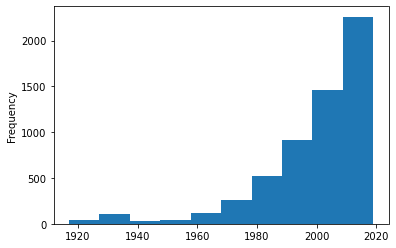

In [38]:
missing_studio_df.aired_from.dt.year.plot(
    kind='hist'
)

Trái với suy đoán của em (các bộ này phải từ trước năm 2000), phần lớn tập trung vào những bộ sau năm 2000. Điều này cũng dễ hiểu vì có thể sau năm 2000 thì số lượng anime trở nên nhiều hơn (ta sẽ kiểm tra lại trong phần trả lời câu hỏi). Vậy bay giờ thử xem phân bố của cột `genre` và `type` như thế nào?

**Với mỗi thể loại, bao nhiêu anime trong số đó là bị thiếu cột `studio`?**

<AxesSubplot:>

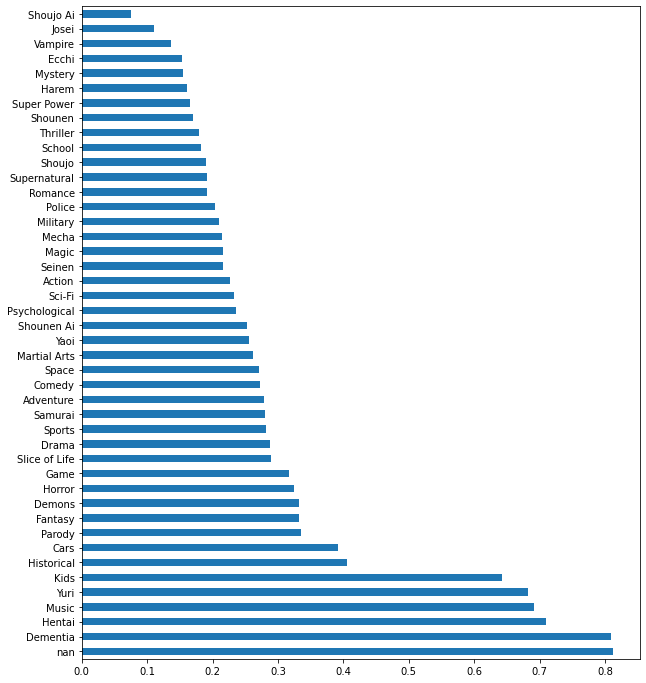

In [39]:
missing_genre_counts = missing_studio_df.genre.explode().value_counts(dropna=False)
genre_counts = animes_df.genre.explode().value_counts(dropna=False)
genre_missing_ratio = missing_genre_counts / genre_counts
genre_missing_ratio.sort_values(ascending=False).plot(
    kind='barh',
    figsize=(10, 12)
)

Vậy những thể loại chính bị thiếu cột `studio` là: "không có thể loại", dementia (thể loại có nhân vật bị có vấn đề nặng về tâm lý), hentai (thể loại mà...), music, yuri, kids. Ta sẽ xem những thể loại này có phổ biến hay không trước khi đưa ra kết luận. Sẽ tiếp tục sau phần **Đặt câu hỏi**.

**Những bộ anime bị thiếu cột studio đến từ nguồn nào (manga, novel, game, ...)?**

<AxesSubplot:>

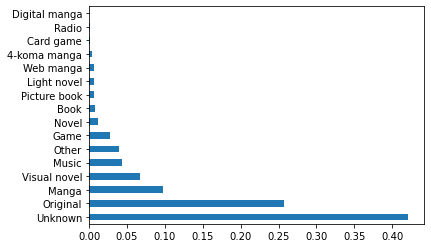

In [40]:
missing_sources = missing_studio_df.source.value_counts() / len(missing_studio_df)
missing_sources.plot(kind='barh')

Như vậy gần một nửa các bộ anime bị thiếu thông tin về studio cũng... không biết là nó đến từ nguồn nào `:P`, tiếp theo là "Original" (tức không phải adaption từ nguồn khác).

---

## C. ĐẶT CÂU HỎI


- **Câu 1:** Xu hướng sản xuất anime trong khoảng thời gian qua là như thế nào (theo khoảng thời gian "aired" có trong database)?
- **Câu 2:** Các anime thường mang những thể loại nào? Thể loại nào có nhiều và ít anime nhất?
- **Câu 3:** Người dùng có hứng thú những thể loại anime nào nhất? Anime thuộc vào rating nào (PG-13, G, ...) là "ăn khách" nhất?
- **Câu 4:** Studio nào làm ra những anime "chất lượng" nhất?
- **Câu 5:** Các thể loại nào hay xuất hiện cùng nhau nhất trong một anime?

In [41]:
animes_df.head()

,title,image_url,type,source,episodes,airing,duration,rating,score,scored_by,...,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,aired_from,aired_to
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,False,24.0,PG-13,7.63,139250,...,Winter 2012,Fridays at Unknown,"[Aniplex, Square Enix, Mainichi Broadcasting S...",Sentai Filmworks,David Production,"[Comedy, Supernatural, Romance, Shounen]","[""Nirvana"" by MUCC]","[#1: ""Nirvana"" by MUCC (eps 1, 11-12), #2: ""Ra...",2012-01-13,2012-03-30
2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,24.0,PG-13,7.89,91206,...,Spring 2007,Unknown,"[TV Tokyo, AIC, Square Enix, Sotsu]",Funimation,Gonzo,"[Comedy, Parody, Romance, School, Shounen]","[""Romantic summer"" by SUN&LUNAR]","[#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hin...",2007-04-02,2007-10-01
5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,False,24.0,PG,7.55,37129,...,Fall 2008,Unknown,"[TV Tokyo, Sotsu]",NaN,Satelight,"[Comedy, Magic, School, Shoujo]","[#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Char...","[#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! (...",2008-10-04,2009-09-25
721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,False,16.0,PG-13,8.21,36501,...,Summer 2002,Fridays at Unknown,"[Memory-Tech, GANSIS, Marvelous AQL]",ADV Films,Hal Film Maker,"[Comedy, Drama, Magic, Romance, Fantasy]","[""Morning Grace"" by Ritsuko Okazaki]","[""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko O...",2002-08-16,2003-05-23
12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,False,24.0,PG-13,8.67,107767,...,Fall 2012,Unknown,"[NHK, Shueisha]",NaN,J.C.Staff,"[Comedy, Drama, Romance, Shounen]","[#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIPE...","[#1: ""Pride on Everyday"" by Sphere (eps 1-13),...",2012-10-06,2013-03-30
